In [3]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns 
import numpy as np
import tensorflow as tf

#installed necessary libraries and imported them

In [6]:
df = pd.read_csv(r"C:\Users\aman\Desktop\MY PROJECT\NSE-RELIANCE.csv")
#Historical prices of RELIANCE  Ind.

In [7]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
0,0,01-01-2015,438.988831,441.812073,437.676270,439.781311,417.988892,1367720,181432,9740,-0.0036
1,1,02-01-2015,439.880371,443.818054,437.998199,438.617340,416.882599,3383424,260835,19270,-0.0026
2,2,05-01-2015,438.344940,441.267212,432.946106,433.812897,412.316284,4662967,328788,39864,-0.0110
3,3,06-01-2015,430.915344,432.401276,412.093750,414.124512,393.603546,8596809,975422,26226,-0.0454
4,4,07-01-2015,414.619812,425.367950,414.570282,423.139069,402.171295,9562421,660342,24450,0.0218


In [8]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
1988,1989,24-01-2023,2440.000000,2443.649902,2387.350098,2415.949951,2415.949951,7609558,349349,15122,-0.0059
1989,1990,25-01-2023,2412.449951,2414.699951,2380.000000,2382.550049,2382.550049,5715684,103914,14987,-0.0138
1990,1991,27-01-2023,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991,452582,59632,-0.0190
1991,1992,30-01-2023,2331.699951,2371.899902,2301.000000,2359.750000,2359.750000,10047822,1392194,29192,0.0096
1992,1993,31-01-2023,2382.000000,2387.650000,2341.000000,2353.850000,2353.850000,10470859,100296,10412,-0.0025


In [9]:
df = df[["Close"]].copy()

In [11]:
df.describe()

,Close
count,1993.000000
mean,1324.338416
std,755.248519
min,401.568542
25%,532.725281
50%,1181.401489
75%,2057.800049
max,2819.850098


In [12]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller #Import adfuller function through module

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.6717794325268911
p-value: 0.8539245265882078


In [15]:
from pmdarima.arima.utils import ndiffs

In [16]:
ndiffs(df.Close, test="adf")

1

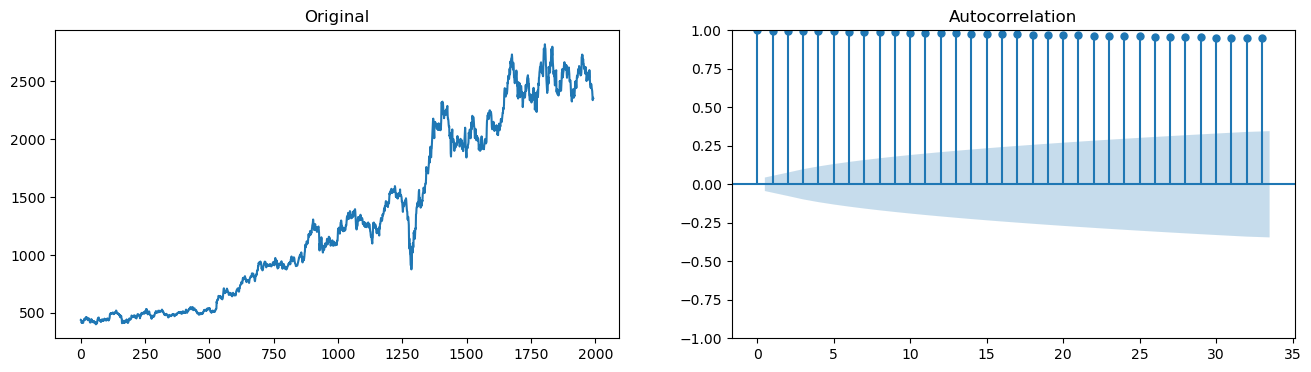

In [17]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Close)

ax1.set_title("Original")

# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(df.Close, ax=ax2);

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

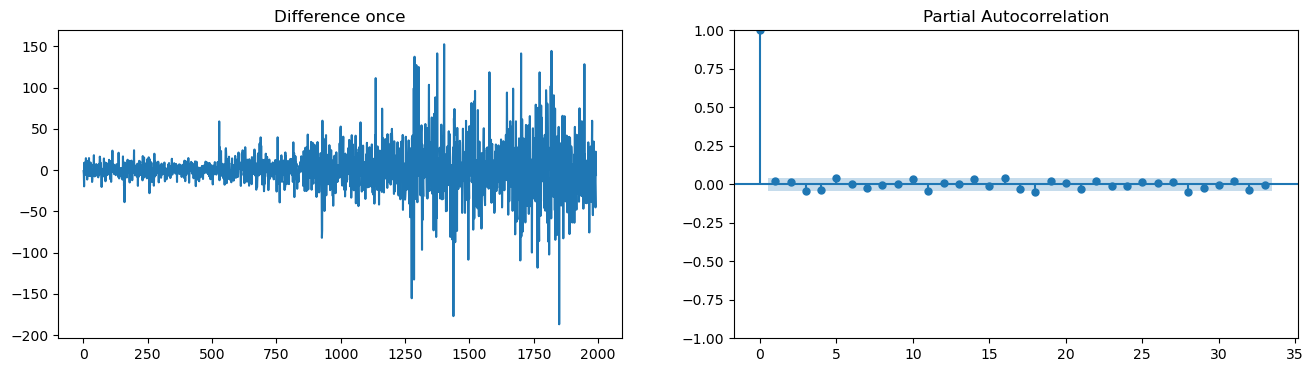

In [19]:
diff = df.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot (diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)

plot_pacf (diff, ax=ax2);

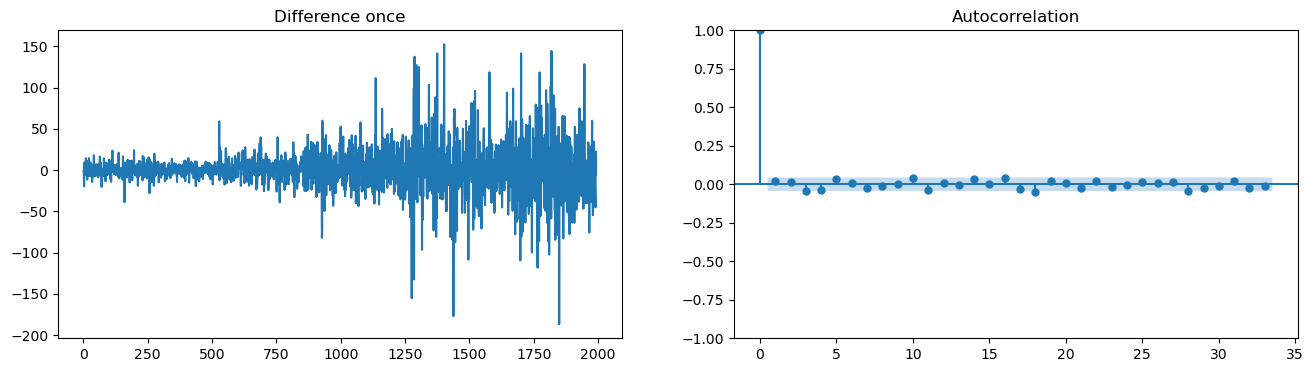

In [20]:
diff = df.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot (diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [21]:
from statsmodels.tsa.arima.model import ARIMA


#Fitting the ARIMA model with a different optimization method (e.g., 'nm')
model = ARIMA(df.Close, order=(5, 1, 5))
result = model.fit()

print(result.summary())

C:\Users\aman\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aman\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1993
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -9400.620
Date:                Fri, 29 Mar 2024   AIC                          18823.240
Time:                        15:41:38   BIC                          18884.806
Sample:                             0   HQIC                         18845.850
                               - 1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5571      0.114     -4.888      0.000      -0.781      -0.334
ar.L2         -0.0399      0.152     -0.261      0.794      -0.339       0.259
ar.L3          0.1191      0.148      0.805      0.4

C:\Users\aman\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(array([3.22190304e-05, 2.98026031e-04, 9.06160229e-03, 6.33909423e-03,
        2.73861758e-04, 4.02737880e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.05475759e-06]),
 array([-183.15009406, -120.85695355,  -58.56381305,    3.72932746,
          66.02246797,  128.31560847,  190.60874898,  252.90188948,
         315.19502999,  377.48817049,  439.781311  ]),
 <BarContainer object of 10 artists>)

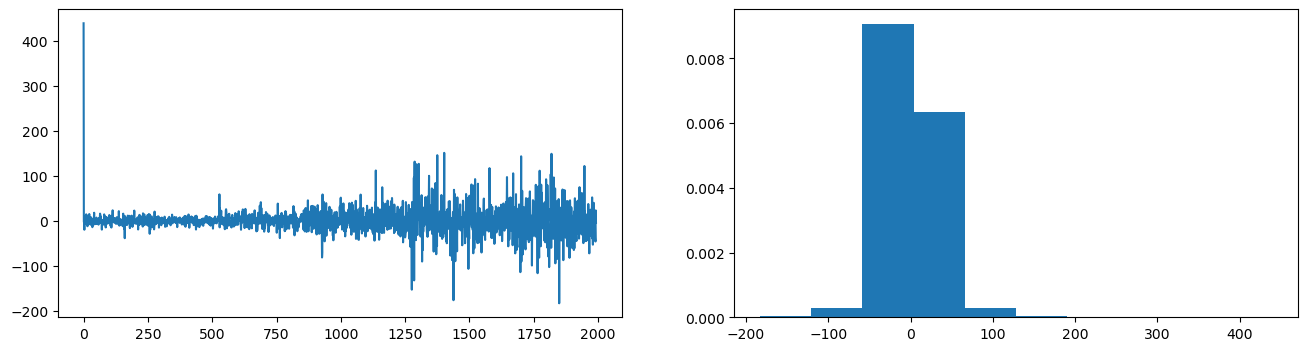

In [22]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot (residuals) 
ax2.hist (residuals, density=True)

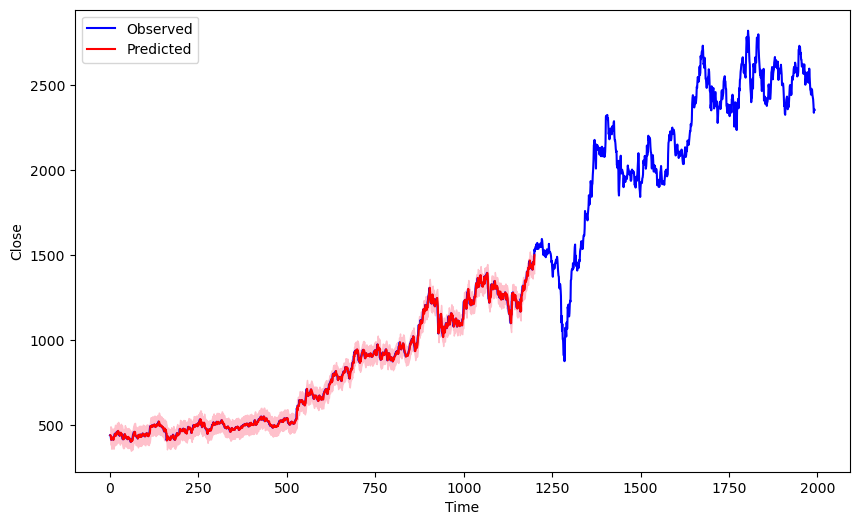

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Get predictions and confidence intervals
pred = result.get_prediction(start=1, end=1200, dynamic=False)
# Plotting the predictions
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.Close.values, label='Observed', color='blue')
ax.plot(pred.predicted_mean, label='Predicted', color='red')
ax.fill_between(pred.conf_int().index, pred.conf_int()['lower Close'], pred.conf_int()['upper Close'], color='pink')
ax.set_xlabel('Time')
ax.set_ylabel('Close')
plt.legend()
plt.show()

In [24]:
#Train and test data split 
n = int(len(df) * 0.75)
train = df.Close[:n]
test = df.Close[n:]

print (len(train))
print (len(test))

1494
499


In [25]:
step = 30
forecast = result.forecast(steps=step)
conf_int = result.conf_int(alpha=0.05)  # 95% confidence level


fc = pd.Series(forecast, index=test[:step].index)
lower = pd.Series(conf_int.iloc[:, 0], index=test[:step].index)
upper = pd.Series(conf_int.iloc[:, 1], index=test[:step].index)

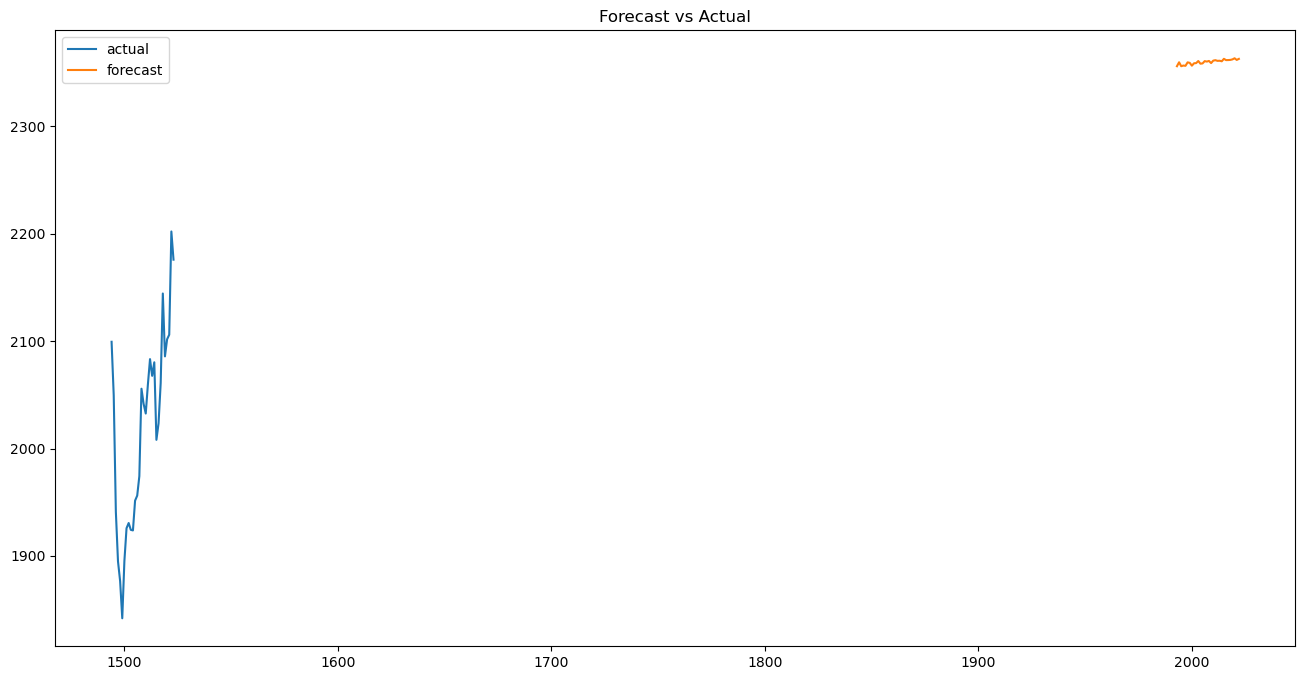

In [26]:
plt.figure(figsize=(16, 8))

plt.plot(test[:step], label="actual")

plt.plot(forecast, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.05)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

 